In [ ]:
import os
import shutil

def copy_file_pairs(date, input_directory, output_directory):
    """
    Copies .jpg files and their corresponding .xml files from an input directory to an output directory based on a specified date.

    :param date: The date in the format YYYY-MM-DD to filter which files to copy.
    :param input_directory: The directory to copy files from.
    :param output_directory: The directory to copy files to.
    """
    # Iterate through all files in the input directory
    for filename in os.listdir(input_directory):
        # Check if the file is a JPG and its name starts with the specified date
        if filename.endswith('.jpg') and filename.startswith(date):
            # Construct the full path for both the current file and its XML pair
            jpg_file_path = os.path.join(input_directory, filename)
            xml_file_path = jpg_file_path.replace('.jpg', '.xml')
            
            # Check if the XML file exists
            if os.path.exists(xml_file_path):
                # Copy the JPG file to the output directory
                shutil.move(jpg_file_path, output_directory)
                print(f"Copied: {filename}")
                
                # Copy the corresponding XML file to the output directory
                xml_filename = os.path.basename(xml_file_path)
                shutil.move(xml_file_path, output_directory)
                print(f"Copied: {xml_filename}")
            else:
                print(f"XML file for {filename} does not exist. Skipping.")
        elif not filename.endswith('.jpg'):
            continue  # Skip non-JPG files
        else:
            continue  # Skip files that do not match the date

copy_file_pairs('2023-11-12', '/home/woody/iwso/iwso122h/Calf_Detection/new_app/data/train', '/home/woody/iwso/iwso122h/Calf_Detection/new_app/data/val')


In [12]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def parse_xml(directory_path):
    counts = {"kalb": 0, "person": 0}
    occurrences = {"kalb": {"single": 0, "multiple": 0}, "person": {"single": 0, "multiple": 0}}

    for filename in os.listdir(directory_path):
        if not filename.endswith('.xml'):
            continue

        path = os.path.join(directory_path, filename)
        tree = ET.parse(path)
        root = tree.getroot()

        temp_counts = {"kalb": 0, "person": 0}

        for obj in root.iter('object'):
            name = obj.find('name').text
            if name in ["kalb", "person"]:
                counts[name] += 1
                temp_counts[name] += 1

        for key in temp_counts:
            if temp_counts[key] == 1:
                occurrences[key]["single"] += 1
            elif temp_counts[key] > 1:
                occurrences[key]["multiple"] += 1

    return counts, occurrences

def plot_graphs(counts, occurrences, output_directory, graph_1_title, graph_1_ext, graph_2_title, graph_2_ext):
    # Graph 1: Number of Kalbs vs Persons
    plt.figure(figsize=(10, 6))
    objects = list(counts.keys())
    performance = list(counts.values())
    colors = ['#8C9FB1', '#04316A']
    bars = plt.bar(objects, performance, color=colors)
    plt.xlabel('Objects')
    plt.ylabel('Count')
    plt.title(graph_1_title)
    for bar, value, color in zip(bars, performance, colors):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{value}', ha='center', va='bottom', color='#005287')
    plt.savefig(os.path.join(output_directory, graph_1_ext))
    plt.show()

    # Graph 2: Multiple Occurrence vs Single Occurrence for Each Kalb and Person
    plt.figure(figsize=(10, 6))
    categories = ['Single Kalb', 'Multiple Kalbs', 'Single Person', 'Multiple Persons']
    values = [occurrences['kalb']['single'], occurrences['kalb']['multiple'], occurrences['person']['single'], occurrences['person']['multiple']]
    color_patterns = ['#8C9FB1', '#8C9FB1', '#04316A', '#04316A']
    bars = plt.bar(categories, values, color=color_patterns)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title(graph_2_title)
    for bar, value, color in zip(bars, values, color_patterns):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{value}', ha='center', va='bottom', color='#005287')
    plt.savefig(os.path.join(output_directory, graph_2_ext))
    plt.show()


def main(directory_path, output_directory, graph_1_title, graph_1_ext, graph_2_title, graph_2_ext):
    counts, occurrences = parse_xml(directory_path)
    plot_graphs(counts, occurrences, output_directory, graph_1_title, graph_1_ext, graph_2_title, graph_2_ext)

# Example usage
# directory_path = 'path/to/your/xml/files'
# output_directory = 'path/to/save/graphs'
# main(directory_path, output_directory)





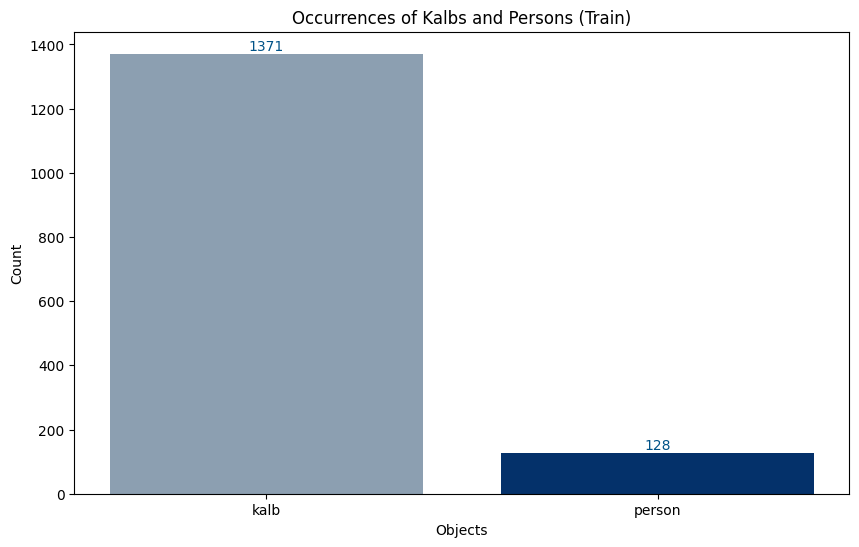

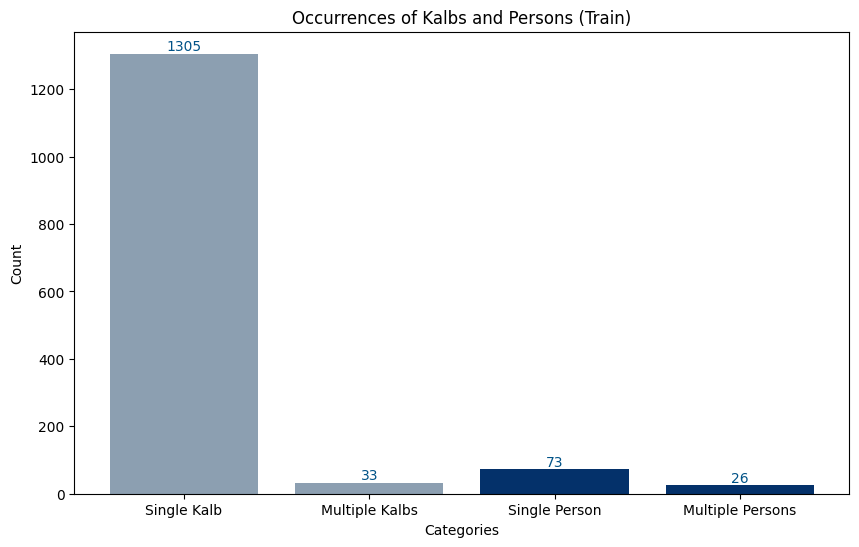

In [13]:
# Train
main('/home/woody/iwso/iwso122h/Calf_Detection/new_app/data/train',
     '/home/woody/iwso/iwso122h/Calf_Detection/data_graphs',
     graph_1_title="Occurrences of Kalbs and Persons (Train)",
     graph_1_ext="graph_1_train.jpg",
     graph_2_title="Occurrences of Kalbs and Persons (Train)",
     graph_2_ext="graph_2_train.jpg"
     )


In [ ]:
# Test
main('/home/woody/iwso/iwso122h/Calf_Detection/new_app/data/test',
     '/home/woody/iwso/iwso122h/Calf_Detection/data_graphs',
     graph_1_title="Occurrences of Kalbs and Persons (Test)",
     graph_1_ext="graph_1_test.jpg",
     graph_2_title="Occurrences of Kalbs and Persons (Test)",
     graph_2_ext="graph_2_test.jpg"
     )


In [2]:
import os
from PIL import Image
from pathlib import Path

def remove_corrupt_jpegs(directory):
    # Path to the directory where the JPEG files are located
    dir_path = Path(directory)
    
    # Count of removed files
    removed_count = 0

    # Iterate through all jpeg files in the directory
    for file_path in dir_path.glob('*.jpg'):
        try:
            # Attempt to open the image
            with Image.open(file_path) as img:
                # Check if the image is loaded correctly by accessing its format
                if img.format != 'JPEG':
                    raise ValueError("Not a JPEG file")
        except Exception as e:
            # If an error occurs, it means the file is likely corrupt or not a JPEG
            os.remove(file_path)
            removed_count += 1
            print(f"Removed corrupt file: {file_path} (Error: {e})")

    print(f"Total files removed: {removed_count}")

# Usage example, replace 'path_to_your_directory' with the actual directory path
remove_corrupt_jpegs('/home/woody/iwso/iwso122h/Calf_Detection/new_img_data/images_test/2023-12-11')


Removed corrupt file: /home/woody/iwso/iwso122h/Calf_Detection/new_img_data/images_test/2023-12-11/2023-12-11_02-09-01.jpg (Error: cannot identify image file '/home/woody/iwso/iwso122h/Calf_Detection/new_img_data/images_test/2023-12-11/2023-12-11_02-09-01.jpg')
Removed corrupt file: /home/woody/iwso/iwso122h/Calf_Detection/new_img_data/images_test/2023-12-11/2023-12-11_07-04-01.jpg (Error: cannot identify image file '/home/woody/iwso/iwso122h/Calf_Detection/new_img_data/images_test/2023-12-11/2023-12-11_07-04-01.jpg')
Removed corrupt file: /home/woody/iwso/iwso122h/Calf_Detection/new_img_data/images_test/2023-12-11/2023-12-11_21-13-01.jpg (Error: cannot identify image file '/home/woody/iwso/iwso122h/Calf_Detection/new_img_data/images_test/2023-12-11/2023-12-11_21-13-01.jpg')
Total files removed: 3


In [3]:
import os

def print_unique_dates(directory):
    # Set to store unique dates
    unique_dates = set()
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Check if the file is an XML file
            date_part = filename.split("_")[0]  # Extract the date part from the filename
            unique_dates.add(date_part)  # Add the date to the set
    
    # Print all unique dates
    for date in unique_dates:
        print(date)

# Usage example:
print_unique_dates('/home/woody/iwso/iwso122h/Calf_Detection/images/images')


2019-05-13
2019-05-16
2019-03-17
2019-06-06
2019-08-22
2019-03-26
2019-07-18
2019-07-26
2019-08-23
2019-03-16
2018-12-23
2019-03-27
2019-08-26
2019-02-03
2018-12-24
2019-01-06
2019-03-01
2019-04-15
2019-02-02
2019-08-30
2019-07-30
2019-07-06
2019-08-08
2019-08-25
2019-03-15
2019-02-10
2019-07-21
2019-08-16
2019-02-01
2019-02-16
2019-04-04
2019-05-07
2019-07-02
2019-04-27
2019-05-12
2019-03-24
2019-03-07
2019-05-31
2019-08-15
2019-05-15
2019-01-24
2019-03-25
2019-05-18
2019-02-25
2018-11-12
2019-04-25
2019-08-10
2019-05-20
2019-04-16
2019-02-05
2018-11-19
2019-03-22
2019-02-08
2019-05-27
2019-06-08
2019-07-12
2018-12-07
2019-02-26
2019-01-30
2019-05-25
2019-06-18
2019-08-09
2019-09-06
2019-04-28
2019-06-10
2019-08-14
2019-01-05
2019-01-29
2019-01-20
2019-05-23
2019-09-04
2019-05-17
2019-04-02
2019-03-20
2019-05-14
2019-03-14
2019-07-14
2019-04-19
2019-03-29
2019-09-09
2019-08-24
2019-08-12
2018-12-19
2018-11-24
2019-03-19
2019-07-13
2019-01-08
2019-02-24
2019-06-17
2019-02-20
2019-08-01

In [1]:
import os
import shutil
from pathlib import Path

def organize_files_by_date(input_dir, output_dir):
    # Define paths to the 'images' and 'annotations' subdirectories
    images_dir = Path(input_dir) / 'images'
    annotations_dir = Path(input_dir) / 'annotations'

    # Create the output directory if it doesn't already exist
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # Dictionary to track files by date
    files_by_date = {}

    # Gather all images and associate them with their dates
    for image_file in images_dir.glob('*.jpg'):
        date = image_file.stem.split('_')[0]
        if date not in files_by_date:
            files_by_date[date] = {'images': [], 'xmls': []}
        files_by_date[date]['images'].append(image_file)

    # Gather all XML files and associate them with their dates
    for xml_file in annotations_dir.glob('*.xml'):
        date = xml_file.stem.split('_')[0]
        if date not in files_by_date:
            files_by_date[date] = {'images': [], 'xmls': []}
        files_by_date[date]['xmls'].append(xml_file)

    # Process each date, creating directories and copying files
    for date, files in files_by_date.items():
        # Create a subdirectory for the date
        date_dir = Path(output_dir) / date
        date_dir.mkdir(exist_ok=True)
        
        # Copy image files
        for image in files['images']:
            shutil.copy(image, date_dir)

        # Copy XML files
        for xml in files['xmls']:
            shutil.copy(xml, date_dir)

input_dir="/home/woody/iwso/iwso122h/Calf_Detection/images"
output_dir="/home/woody/iwso/iwso122h/Calf_Detection/00_data"
organize_files_by_date(input_dir, output_dir)


In [1]:
import os

def delete_all_files(directory):
    # Iterate over all the files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)  # Removes files and links
            elif os.path.isdir(file_path):
                # Optionally extend this to handle directories by removing them or their contents
                print(f"Skipping directory: {file_path}")
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")

delete_dir="/home/woody/iwso/iwso122h/Calf_Detection/data_graphs"
delete_all_files(delete_dir)


In [5]:
import os

def count_files(directory):
    # Initialize a counter for the files
    file_count = 0
    
    # Walk through all directories and files in the given directory
    for root, dirs, files in os.walk(directory):
        file_count += len(files)  # Add count of files in the current directory
    
    return file_count


number_of_files = count_files('/home/woody/iwso/iwso122h/Calf_Detection/images/images')
print(f"There are {number_of_files} files in the directory.")

There are 4369 files in the directory.
